# AlertAI - Algorithms 
This notebook is responsible for the development the algorithms that will detect the anomalies in the data.
Last task of the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Supervised Learning

    3.1 Algorithm A

            a. Data preparation for the input

            b. Model Training

            c. Output results

4. Unsupervised Learning

    4.1 Algorithm B

            a. Data preparation for the input

            b. Model Training

            c. Output results

5. Model Export
6. Conclusions and Validation

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [2]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import keras
from keras import layers
from keras.utils import np_utils, get_file
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, OneClassSVM 
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.utils import shuffle
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


### Utilities

In [22]:
def show_results(y_true,y_pred):
    print('=============Results=============')
    print("Accuracy => ", metrics.accuracy_score(y_true, y_pred))
    #print("Precision => ",metrics.precision_score(y_true, y_pred))
    print('Mean Absolute Error =>', metrics.mean_absolute_error(y_true, y_pred))
    print('Mean Squared Error =>', metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error =>', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print('Classification Matrix :')
    print(confusion_matrix(y_true,y_pred))
    print('Classification Report :')
    print(classification_report(y_true,y_pred))
    print('=================================')

def categorical2numerical(array):
    numerical = []
    for elem in array:
        classification = np.argmax(elem)
        numerical.append(classification)
    return numerical


# with open('your_file.txt', 'w') as f:
#     for item in y_train.values.ravel():
#         print(item,file = f)

# with open('your_file2.txt', 'w') as f:
#     for item in y_train_nn:
#         print(item,file = f)

## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [4]:
# dataDir = 'data/data.csv' # remove before push
dataDir = r'C:\Users\JCost\OneDrive\Ambiente de Trabalho\Code\PEI\AlertAI\data'
dataFile = r'\raw_data_22_12.csv'
data = pd.read_csv(dataDir + dataFile)

best_columns = ['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure']

X = data[best_columns]
y = data[['sensors.classification']]

print(X.shape)
print(y.shape)

#sklearn para dividir os dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123) #shuffle=true by default

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9409, 6)
(9409, 1)
(6586, 6)
(2823, 6)
(6586, 1)
(2823, 1)


(8698, 13)
(711, 13)


Normal Situation captures:  8698
Anomalous Situation captures:  711


        sensors.id  sensors.pm25  sensors.pm10  sensors.temperature  \
count   711.000000    711.000000    711.000000           711.000000   
mean   2521.323488    475.220956    972.984529            18.004650   
std    1525.921423    254.630276    592.532948             2.390359   
min     494.000000      2.700000      8.700000            11.200313   
25%    1868.500000    257.800000    531.550000            16.782539   
50%    2066.000000    446.200000    860.800000            18.247383   
75%    2245.500000    653.000000   1414.700000            19.433125   
max    9621.000000    999.900000   1999.900000            24.750508   

         sensors.gas  sensors.humidity  sensors.pressure  sensors.altitude  \
count     711.000000        711.000000        711.000000        711.000000   
mean    31401.663854         61.697405       1006.647483         55.518173   
std     16848.279741          8.8

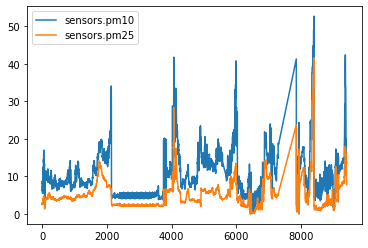

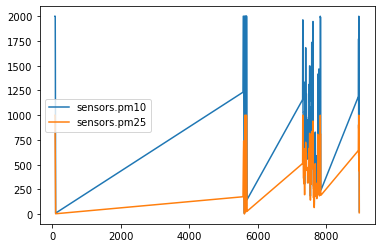

In [5]:
#Observação de dados
x0 = data.loc[data['sensors.classification'] == 0]
x1 = data.loc[data['sensors.classification'] > 0]


print(x0.shape)
print(x1.shape)
print('\n')

print("Normal Situation captures: ", x0.shape[0])
print("Anomalous Situation captures: ", x1.shape[0])
print('\n')

x0.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

x1.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

print(x1.describe())

## 3. Supervised Learning
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Algoritmo "SVM (Support Vector Machine)"

#### SVM (Best Kernel)

In [20]:
# Prepare multiple classifiers with diferent kernels

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=6, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [21]:
# Train and Test each of the kernels
for i in range(4):
    svn = getClassifier(i)
    svn.fit(X_train, y_train.values.ravel())
    svn_y_pred = svn.predict(X_test)
    print('<<<<<<<<')
    print("Algorithm: SVM")
    print("Evaluation:", kernels[i], "kernel")
    show_results(y_test,y_pred=svn_y_pred)
    print('>>>>>>>>')
    print('\n')

<<<<<<<<
Algorithm: SVM
Evaluation: Polynomial kernel
=============Results=============
Accuracy =>  0.23817567567567569
Precision =>  0.23817567567567569
Mean Absolute Error => 0.7618243243243243
Mean Squared Error => 0.7618243243243243
Root Mean Squared Error => 0.8728254833151495
Classification Matrix :
[[  0 451]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       451
           1       0.24      1.00      0.38       141

    accuracy                           0.24       592
   macro avg       0.12      0.50      0.19       592
weighted avg       0.06      0.24      0.09       592

>>>>>>>>


<<<<<<<<
Algorithm: SVM
Evaluation: RBF kernel
=============Results=============
Accuracy =>  0.7618243243243243
Precision =>  0.0
Mean Absolute Error => 0.23817567567567569
Mean Squared Error => 0.23817567567567569
Root Mean Squared Error => 0.48803245350660407
Classification Matrix :
[[451   0]
 [141   0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages

<<<<<<<<
Algorithm: SVM
Evaluation: Linear kernel
=============Results=============
Accuracy =>  1.0
Precision =>  1.0
Mean Absolute Error => 0.0
Mean Squared Error => 0.0
Root Mean Squared Error => 0.0
Classification Matrix :
[[451   0]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592

>>>>>>>>




#### SVM Parameter Tuning - GridSearch

#### b. Model Trainig

In [87]:
#Implementing SVM with Grid Search for parameters
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,n_jobs=-1,verbose=1)
grid.fit(X_train,y_train.values.ravel())
print('Best parameters => ', grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 59.8min


#### c. Output results

In [23]:
# Predition of the test sample
grid_pred = grid.predict(X_test)

In [24]:
show_results(y_true=y_test,y_pred=grid_pred)

=============Results=============
Accuracy =>  1.0
Precision =>  1.0
Mean Absolute Error => 0.0
Mean Squared Error => 0.0
Root Mean Squared Error => 0.0
Classification Matrix :
[[451   0]
 [  0 141]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592



#### d. Model Saving 

In [10]:
# Save the result of the gridsearch model which is the best

filename = 'model_saves/svm_gridsearch.sav'
pickle.dump(grid, open(filename, 'wb'))

### 3.2 Algoritmo "Neural Networks"
Nota: Versão muito muito simples e inicial

#### a. Data preparation for input

In [11]:
num_classes = 5 # Number of classes right now (0-Normal,1-smoke,2-ArtificialSmoke,3-Water,4-Smell)
y_train_nn = pd.get_dummies(y_train.values.ravel())
y_test_nn = pd.get_dummies(y_test.values.ravel())
# print(X_train.shape)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

#### b. Model Train and Results

In [42]:
# Model Build
nn = keras.Sequential()

nn.add(layers.Dense(64,input_dim=X_train.shape[1],activation='relu'))
nn.add(layers.Dense(16,activation='relu'))
nn.add(layers.Dense(num_classes,activation='softmax'))

# Model Compile
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.build()

# Model Summary
print(nn.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 85        
Total params: 1,573
Trainable params: 1,573
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
# Model Training 
epochs = 30
batch_size = 512
nn.fit(X_train, y_train_nn.values, validation_data = (X_test, y_test_nn.values), epochs = epochs, verbose = 2)

Train on 6586 samples, validate on 2823 samples
Epoch 1/30
 - 2s - loss: 0.0622 - accuracy: 0.9862 - val_loss: 0.0680 - val_accuracy: 0.9819
Epoch 2/30
 - 2s - loss: 0.0605 - accuracy: 0.9860 - val_loss: 0.0689 - val_accuracy: 0.9819
Epoch 3/30
 - 1s - loss: 0.0608 - accuracy: 0.9856 - val_loss: 0.0676 - val_accuracy: 0.9819
Epoch 4/30
 - 1s - loss: 0.0607 - accuracy: 0.9860 - val_loss: 0.0674 - val_accuracy: 0.9819
Epoch 5/30
 - 1s - loss: 0.0590 - accuracy: 0.9863 - val_loss: 0.0762 - val_accuracy: 0.9805
Epoch 6/30
 - 1s - loss: 0.0625 - accuracy: 0.9862 - val_loss: 0.0710 - val_accuracy: 0.9819
Epoch 7/30
 - 1s - loss: 0.0614 - accuracy: 0.9860 - val_loss: 0.0733 - val_accuracy: 0.9819
Epoch 8/30
 - 1s - loss: 0.0651 - accuracy: 0.9860 - val_loss: 0.0687 - val_accuracy: 0.9819
Epoch 9/30
 - 1s - loss: 0.6010 - accuracy: 0.9774 - val_loss: 0.0765 - val_accuracy: 0.9819
Epoch 10/30
 - 1s - loss: 0.1214 - accuracy: 0.9847 - val_loss: 0.5060 - val_accuracy: 0.9777
Epoch 11/30
 - 1s - l

In [66]:
# model testing
nn_y_pred = nn.predict(X_test).round()
print(nn_y_pred[1:200])

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0.

In [67]:
# Transform categorical values into numerical
nnNumY_pred = categorical2numerical(nn_y_pred)

In [68]:
print("Algorithm: Keras Neural Network")
show_results(y_true=y_test,y_pred=nnNumY_pred)

Algorithm: Keras Neural Network
=============Results=============
Accuracy =>  0.9812256464753808
Mean Absolute Error => 0.030464045341834927
Mean Squared Error => 0.05880269217144881
Root Mean Squared Error => 0.24249266416007065
Classification Matrix :
[[2580    2    0    0    0]
 [   1  190    0    0    0]
 [   1   24    0    0    0]
 [   1   18    0    0    0]
 [   0    6    0    0    0]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2582
           1       0.79      0.99      0.88       191
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         6

    accuracy                           0.98      2823
   macro avg       0.36      0.40      0.38      2823
weighted avg       0.97      0.98      0.97      2823



#### b. Model Train and Results - sklearn

In [78]:
sklNN = MLPClassifier(hidden_layer_sizes=(64,128,32), activation='relu', solver='adam', max_iter=10000)
sklNN.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 128, 32), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [79]:
sklNN_y_pred = sklNN.predict(X_test)
print(sklNN_y_pred)

[0 0 0 ... 0 0 1]


In [80]:
print("Algorithm: SK-Learn Neural Network")
show_results(y_true=y_test,y_pred=sklNN_y_pred)

Algorithm: SK-Learn Neural Network
=============Results=============
Accuracy =>  0.9716613531703862
Mean Absolute Error => 0.03471484236627701
Mean Squared Error => 0.05171803046404534
Root Mean Squared Error => 0.22741598550683578
Classification Matrix :
[[2578    0    4    0    0]
 [   1  160   30    0    0]
 [   1   19    5    0    0]
 [   1    0   18    0    0]
 [   0    5    1    0    0]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2582
           1       0.87      0.84      0.85       191
           2       0.09      0.20      0.12        25
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         6

    accuracy                           0.97      2823
   macro avg       0.39      0.41      0.39      2823
weighted avg       0.97      0.97      0.97      2823



#### d. Model Saving 

In [19]:
#Neural Network implementada
filename = 'model_saves/nn.hdf5'
#pickle.dump(nn, open(filename, 'wb'))
nn.save(filename)

In [44]:
#Neural Network sklearn
filename = 'model_saves/sklearn_nn.sav'
pickle.dump(sklNN, open(filename, 'wb'))

### 3.3 Algoritmo "Naive Bayes"

#### a. Data preparation for input

#### b. Model Trainig

In [81]:
gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

#### c. Output results

In [82]:
gaussNB_y_pred = gaussNB.predict(X_test)
print(gaussNB_y_pred)

[0 0 0 ... 0 0 1]


In [83]:
print("Algorithm: Naive Bayes")
show_results(y_true=y_test,y_pred=gaussNB_y_pred)

Algorithm: Naive Bayes
=============Results=============
Accuracy =>  0.989727240524265
Mean Absolute Error => 0.012398157987956075
Mean Squared Error => 0.018065887353878853
Root Mean Squared Error => 0.13440940202931806
Classification Matrix :
[[2563   19    0    0    0]
 [   1  190    0    0    0]
 [   0    5   20    0    0]
 [   1    2    0   16    0]
 [   0    1    0    0    5]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2582
           1       0.88      0.99      0.93       191
           2       1.00      0.80      0.89        25
           3       1.00      0.84      0.91        19
           4       1.00      0.83      0.91         6

    accuracy                           0.99      2823
   macro avg       0.97      0.89      0.93      2823
weighted avg       0.99      0.99      0.99      2823



#### d. Model Saving 

In [48]:
filename = 'model_saves/gaussNB.sav'
pickle.dump(gaussNB, open(filename, 'wb'))

### 3.4 Algoritmo "Decision Trees/Random Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [84]:
#Instanciar o modelo com x decision trees
randForestReg = RandomForestClassifier(n_estimators = 50, random_state = 0) #random_state: "the results will be the same each time I run the split for reproducible results"

#Treinar o modelo
randForestReg.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### c. Output results

In [85]:
# Predictions in test dataset
randForestReg_y_pred = randForestReg.predict(X_test)
print(randForestReg_y_pred)

[0 0 0 ... 0 0 1]


In [86]:
print("Algorithm: Random Forest")
show_results(y_true=y_test,y_pred=randForestReg_y_pred)

Algorithm: Random Forest
=============Results=============
Accuracy =>  0.9992915338292596
Mean Absolute Error => 0.0007084661707403471
Mean Squared Error => 0.0007084661707403471
Root Mean Squared Error => 0.02661702783445866
Classification Matrix :
[[2582    0    0    0    0]
 [   1  189    1    0    0]
 [   0    0   25    0    0]
 [   0    0    0   19    0]
 [   0    0    0    0    6]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2582
           1       1.00      0.99      0.99       191
           2       0.96      1.00      0.98        25
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00         6

    accuracy                           1.00      2823
   macro avg       0.99      1.00      0.99      2823
weighted avg       1.00      1.00      1.00      2823



#### d. Model Saving 

In [7]:
filename = 'model_saves/randomforest.sav'
pickle.dump(randForestReg, open(filename, 'wb'))

## 5. Model Exportation 

## 5. Conclusions and Validation
Conclusion and validations belongs to this section

### Supervised algorithm

In [39]:
X_sample = X_test
Y_sample = y_test

In [40]:
supervisedModels = {'SVM-Grid': grid,
                    'NeuralNet-Keras' : nn,
                    'NeuralNet2-SKL' : sklNN,
                    'NaiveBayes' : gaussNB,
                    'RandForest' : randForestReg
                    }
accuracies = {}
precisions = {}
print('Model\t\t|     Accuracy\t|    Precision\t|')
print('----------------|--------------------------------')
for name,model in supervisedModels.items():
    tempPreds = model.predict(X_sample)
    tempAccuracy = metrics.accuracy_score(Y_sample, tempPreds.round())
    tempPrecision = metrics.precision_score(Y_sample, tempPreds.round())
    tempAccuracy =  round(tempAccuracy,2)
    tempPrecision = round(tempPrecision,2)
    accuracies[name] = tempAccuracy
    precisions[name] = tempPrecision
    print(name + '\t|\t' + str(tempAccuracy) + '\t|\t' + str(tempPrecision)+ '\t|')
    

Model		|     Accuracy	|    Precision	|
----------------|--------------------------------
SVM-Grid	|	1.0	|	1.0	|
NeuralNet-Keras	|	0.99	|	0.99	|
NeuralNet2-SKL	|	1.0	|	1.0	|
NaiveBayes	|	0.98	|	0.92	|
RandForest	|	1.0	|	1.0	|
